<h1><b><center>Projet 4</center></b></h1>
<h1><b><center>Anticipez les besoins en consommation électrique de bâtiments</center></b></h1>

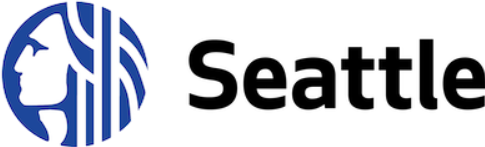

Nous commençons par importer le fichier data.csv.

In [1]:
# Importation des librairies

import os
import ast
import math
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

os.chdir('Desktop/OC/Projet_4')

In [2]:
# Importation du dataframe 'data'

data = pd.read_csv('data.csv')
data

,Unnamed: 0,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,...,32,33,34,35,36,37,38,39,40,41
0,0,-1.058969,-0.06985,1.339722,0.358979,-0.494835,0.465935,0.052842,0.597321,0.911524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,-1.058969,-0.06985,1.339722,0.358979,-0.494835,0.465935,-0.135615,0.620046,0.913953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.049503,-0.06985,1.177006,0.525541,1.555271,0.466789,-0.097515,0.718281,1.104870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.049503,-0.06985,1.177006,0.525541,1.555271,0.466789,-0.488195,0.715628,0.972593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.232741,-0.06985,5.598396,2.877725,-0.494835,3.119199,-1.958442,2.145410,3.822846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,3272,0.868903,-0.06985,-0.520370,-1.715349,-0.494835,-1.719175,-0.692038,-0.790598,-0.652932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3273,3273,1.289508,-0.06985,-0.520370,-1.439578,-0.494835,-1.428676,0.919145,-0.716916,-0.529302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3274,3274,0.384785,-0.06985,-0.520370,-1.644403,-0.494835,-1.644439,-0.480163,0.471252,0.792953,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3275,3275,0.838753,-0.06985,-0.520370,-1.571895,-0.494835,-1.568059,0.725946,-0.900260,-0.639610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


La colonne 'Unnamed:0' est apparue dû à une erreur d'importation. Elle est ainsi supprimée.

In [3]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

<h2><center>II. Prédiction de la consommation d'énergie (Site Energy Use)</h2></center>

Dans ce travail, nous avons trois modélisation à effectuer:

* Modélisation du SiteEnergyUse(kBtu)

* Modélisation du TotalGHGEmissions

* Modélisation du TotalGHGEmissions avec ENERGYSTARScore

Nous définissons des dataframes pour les variables (X, X_E) et les cibles (y, y_1, y_2).

X et X_E representent les variable sans et avec ENERGYSTARScore respectivement.

y represente les cibles. 

y_1 et y_2 representent les cibles individuelles.

In [4]:
# Dataframe y pour les cibles

y_columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
y = data[y_columns]

# y_1 et y_2 sont les cibles individuelles 
y_1 = y['SiteEnergyUse(kBtu)']
y_2 = y['TotalGHGEmissions']
y

,SiteEnergyUse(kBtu),TotalGHGEmissions
0,0.597321,0.911524
1,0.620046,0.913953
2,0.718281,1.104870
3,0.715628,0.972593
4,2.145410,3.822846
...,...,...
3272,-0.790598,-0.652932
3273,-0.716916,-0.529302
3274,0.471252,0.792953
3275,-0.900260,-0.639610


In [5]:
# Les variables X et X_E

X_E = data.drop(y_columns, axis=1)
X = X_E.drop('ENERGYSTARScore', axis=1)
X

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Latitude,Longitude,Distance,0,...,32,33,34,35,36,37,38,39,40,41
0,-1.058969,-0.06985,1.339722,0.358979,-0.494835,0.465935,-0.071984,-0.177609,-1.177079,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.058969,-0.06985,1.339722,0.358979,-0.494835,0.465935,-0.071782,-0.177305,-1.177435,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.049503,-0.06985,1.177006,0.525541,1.555271,0.466789,-0.051671,-0.012023,-1.251700,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.049503,-0.06985,1.177006,0.525541,1.555271,0.466789,-0.053002,0.011199,-1.251152,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232741,-0.06985,5.598396,2.877725,-0.494835,3.119199,-0.047961,-0.165443,-1.208449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.868903,-0.06985,-0.520370,-1.715349,-0.494835,-1.719175,-1.004452,0.881748,0.338267,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3273,1.289508,-0.06985,-0.520370,-1.439578,-0.494835,-1.428676,-0.402481,0.434764,-0.645330,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3274,0.384785,-0.06985,-0.520370,-1.644403,-0.494835,-1.644439,0.430738,-1.000269,-0.447369,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3275,0.838753,-0.06985,-0.520370,-1.571895,-0.494835,-1.568059,-1.811250,0.375617,1.516802,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h3><center>II.1. Modélisation avec différents modèles</h3></center>

D'abord, nous allons modéliser les cibles sans ENERGYSTARScore. Cette modélisation sera faite avec 8 modèles sans réglage des hyperparamètres. Ensuite, nous consulterons les résultats des modèles afin de choisir le modèle idéal. Les hyperparamètres du modèle idéal est ensuite réglé afin de trouver le meilleur fit.

D'abord, nous définissons les 8 modèles qui seront utilisé pour la modélisation.

In [6]:
# Algorithmes de modélisation

algos = {'LinearRegression' : LinearRegression(),
         'Ridge' : Ridge(),
         'ElasticNet' : ElasticNet(),
         'Support Vector': SVR(),
         'BaggingRegressor': BaggingRegressor(),
         'AdaBoostRegressor': AdaBoostRegressor(),
         'Random Forest' : RandomForestRegressor(),
         'XGBoost' : XGBRegressor()}

In [7]:
# Modélisation des ciblesavec les différents algorithmes

results = []
X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size = 0.2, random_state = 42)

for algo_name, algo in algos.items():
    print('Testing: ', algo_name)
    for column in y_columns:
        y_test = y_test_all[column]
        y_train = y_train_all[column]
        model = algo
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        med_abs_err = median_absolute_error(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)
        results.append([algo_name, column, model.score(X_train, y_train), mae, rmse, med_abs_err, r_squared])
    print('**********Completed:**********')

Testing:  LinearRegression
**********Completed:**********
Testing:  Ridge
**********Completed:**********
Testing:  ElasticNet
**********Completed:**********
Testing:  Support Vector
**********Completed:**********
Testing:  BaggingRegressor
**********Completed:**********
Testing:  AdaBoostRegressor
**********Completed:**********
Testing:  Random Forest
**********Completed:**********
Testing:  XGBoost
**********Completed:**********


La modélisation des cibles avec les 8 modèles est finie. Maintenant, nous afficherons les résultats du modèle pour SiteEnergyUse(kBtu).

In [8]:
# Résultats de la modélisation du Site Energy Use (kBtu)

results = pd.DataFrame(results, columns=['Modèle', 'Cible','Train score', 'MAE', 'RMSE', 'Med Abs Error', 'Regression(R2)'])

result_1 = results[results['Cible'] == 'SiteEnergyUse(kBtu)']
result_1 = result_1.reset_index(drop = True)

result_1

,Modèle,Cible,Train score,MAE,RMSE,Med Abs Error,Regression(R2)
0,LinearRegression,SiteEnergyUse(kBtu),0.733004,0.358042,0.558619,0.261680,0.685843
1,Ridge,SiteEnergyUse(kBtu),0.732366,0.358843,0.559266,0.261654,0.685116
2,ElasticNet,SiteEnergyUse(kBtu),0.131553,0.650485,0.930249,0.509928,0.128809
3,Support Vector,SiteEnergyUse(kBtu),0.637697,0.343335,0.621213,0.209347,0.611495
4,BaggingRegressor,SiteEnergyUse(kBtu),0.961472,0.263595,0.515484,0.154652,0.732487
5,AdaBoostRegressor,SiteEnergyUse(kBtu),0.648950,0.500116,0.726592,0.364673,0.468509
6,Random Forest,SiteEnergyUse(kBtu),0.969931,0.246283,0.485019,0.142842,0.763172
7,XGBoost,SiteEnergyUse(kBtu),0.985817,0.252281,0.522589,0.132453,0.725061


De ces résultats, nous identifions le Random Forest comme le modèle idéal pour la modélisation du SiteEnergyUse(kBtu). Ce modèle sera ensuite réglé afin de trouver les meilleurs hyperparamètres.

<h3><center>II.2. Tuning du modèle</h3></center>

Nous avons utilisé GridSearchCV afin d'identifier ces paramètres. Les hyperparamètres du Random Forest sont:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* min_weight_fraction_leaf
* n_estimators

Malgré cet effort, nous obtenons un pire fit. De ce fait, nous cherchons les hyperparamètres un par un avec GridSearchCV. Nous arrêtons de chercher les paramètres quand nous obtenons une pire régression. Pour ce modèle, nous avons pu améliorer que le 'n_estimators'.

In [9]:
# Tuning du n_estimators pour RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size = 0.2, random_state = 42)

parameters = {"n_estimators": [5, 10, 20, 50, 100, 200, 500, 1000]}

grid = GridSearchCV(estimator = RandomForestRegressor(random_state =42, max_features='auto'), param_grid = parameters,
                    scoring = 'r2', cv = 5, verbose = 1, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

rmse = mean_squared_error(y_test, grid_result.predict(X_test), squared = False)
mae = mean_absolute_error(y_test, grid_result.predict(X_test))
med_abs_err = median_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, grid_result.predict(X_test))
t_score = grid_result.score(X_train, y_train)
print(grid_result.best_params_)
print(rmse)
print(mae)
print(med_abs_err)
print(r_squared)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'n_estimators': 1000}
0.48324452309558746
0.24396648968315196
0.29158010319522654
0.7649019894936598


Avec GridSearchCV, nous avons pu améliorer la régression obtenu avec le modèle. Le réglage des autres hyperparamètres n'a pas amélioré le fit du modèle. 

Maintenant, nous allons évaluer les meilleurs features du modèle.

Feature: 0, Score: 0.03456
Feature: 1, Score: 0.00092
Feature: 2, Score: 0.01227
Feature: 3, Score: 0.45325
Feature: 4, Score: 0.00317
Feature: 5, Score: 0.04961
Feature: 6, Score: 0.03477
Feature: 7, Score: 0.03393
Feature: 8, Score: 0.03939
Feature: 9, Score: 0.00085
Feature: 10, Score: 0.00150
Feature: 11, Score: 0.00139
Feature: 12, Score: 0.00013
Feature: 13, Score: 0.00460
Feature: 14, Score: 0.00153
Feature: 15, Score: 0.00154
Feature: 16, Score: 0.00223
Feature: 17, Score: 0.00253
Feature: 18, Score: 0.00131
Feature: 19, Score: 0.00045
Feature: 20, Score: 0.00395
Feature: 21, Score: 0.00906
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.01079
Feature: 24, Score: 0.00125
Feature: 25, Score: 0.00278
Feature: 26, Score: 0.00276
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.01178
Feature: 29, Score: 0.00196
Feature: 30, Score: 0.00317
Feature: 31, Score: 0.02237
Feature: 32, Score: 0.00023
Feature: 33, Score: 0.00965
Feature: 34, Score: 0.00256
Feature: 35, Score: 0.00093
Fe

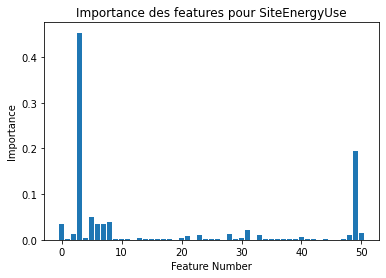

In [10]:
# Evaluation des features du modèle

X_train, X_test, y_train_all, y_test_all = train_test_split(X, y_1, test_size = 0.2, random_state = 42)
y_test = y_test_all
y_train = y_train_all
model = RandomForestRegressor(random_state = 42, max_features = 'auto', n_estimators = 1000)
model.fit(X_train, y_train)

importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.xlabel("Feature Number")
plt.ylabel("Importance")
plt.title("Importance des features pour SiteEnergyUse")
plt.bar([x for x in range(len(importance))], importance);

En consultant le dataframe 'feature_list' du notebook Projet_4_Exploration, nous identifons les meilleurs features du modèle. Les meilleurs features sont:

1) PropertyGFATotal (45.3%)

2) ComplianceStatus_MissingData (19.5%)

3) PropertyGFAbuilding(s) (5%)

4) Distance (3.9%)

5) Latitude (3.5%)

6) YearBuilt (3.5%)

7) Longitude (3.4%)

8) PrimaryPropertyType_Supermarket/Grocery Store (2.2%)

9) ComplianceStatus_Non-Compliant (1.5%)

10) NumberofFloors (1.2%)

Ensuite, nous consulterons les résultats obtenus pour la modélisation du TotalGHGEmissions avec les 8 modèles.

<h2><center>III. Prédiction des émissions de CO2 (Total GHG Emissions)</h2></center>

<h3><center>III.1. Modélisation avec différents modèles</h3></center>

In [11]:
# Résultats de la modélisation du TotalGHGEmissions

result_2 = results[results['Cible'] == 'TotalGHGEmissions']
result_2 = result_2.reset_index(drop = True)

result_2

,Modèle,Cible,Train score,MAE,RMSE,Med Abs Error,Regression(R2)
0,LinearRegression,TotalGHGEmissions,0.625499,0.482121,0.647964,0.386546,0.663207
1,Ridge,TotalGHGEmissions,0.625236,0.483927,0.651200,0.388623,0.659835
2,ElasticNet,TotalGHGEmissions,0.115591,0.711233,1.061272,0.562665,0.096527
3,Support Vector,TotalGHGEmissions,0.707984,0.414545,0.652034,0.237032,0.658963
4,BaggingRegressor,TotalGHGEmissions,0.958012,0.306471,0.495445,0.168521,0.803097
5,AdaBoostRegressor,TotalGHGEmissions,0.210186,0.780452,0.887176,0.789336,0.368635
6,Random Forest,TotalGHGEmissions,0.969429,0.289111,0.475240,0.160978,0.818830
7,XGBoost,TotalGHGEmissions,0.979700,0.283663,0.468765,0.164211,0.823733


De ces résultats, nous trouvons que le XGBoost est le meilleur modèle pour la prédiction du TotalGHGEmissions. Ensuite, nous allons améliorer le modèle en réglant les hyperparamètres du modèle.

<h3><center>III.1. Tuning du modèle</h3></center>

Les hyperparamètres du XGBoost sont:
* learning_rate
* max_depth
* min_child_weight
* subsample
* colsample_bytree, colsample_bylevel, colsample_bynode
* n_estimators

Nous cherchons les hyperparamètres un par un avec GridSearchCV.

In [12]:
# Tuning du n_estimators de XGBoost

X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size = 0.2, random_state = 42)

parameters = {"n_estimators": [5, 10, 20, 50, 100, 200, 500, 1000]}

grid = GridSearchCV(estimator = XGBRegressor(random_state = 42), param_grid = parameters, 
                    scoring = 'r2', cv = 5, verbose = 1, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

rmse = mean_squared_error(y_test, grid_result.predict(X_test), squared = False)
mae = mean_absolute_error(y_test, grid_result.predict(X_test))
med_abs_err = median_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, grid_result.predict(X_test))
t_score = grid_result.score(X_train, y_train)
print(grid_result.best_params_)
print(rmse)
print(mae)
print(med_abs_err)
print(r_squared)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'n_estimators': 1000}
0.4480643616532546
0.24196344800485006
0.16421096596841506
0.8389568381712167


Nous avons trouvé le meilleur n_estimators. Ce paramètre est utilisé pour le réglage du prochain hyperparamètre.

In [13]:
# Tuning du max_depth de XGBoost

X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size = 0.2, random_state = 42)

parameters = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(estimator = XGBRegressor(random_state = 42, n_estimators = 1000), param_grid = parameters, 
                    scoring = 'r2', cv = 5, verbose = 1, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

rmse = mean_squared_error(y_test, grid_result.predict(X_test), squared = False)
mae = mean_absolute_error(y_test, grid_result.predict(X_test))
med_abs_err = median_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, grid_result.predict(X_test))
t_score = grid_result.score(X_train, y_train)
print(grid_result.best_params_)
print(rmse)
print(mae)
print(med_abs_err)
print(r_squared)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 5}
0.4417164773664606
0.2501275392731936
0.16421096596841506
0.8434876240166443


In [14]:
# Tuning du learning_rate de XGBoost

X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size = 0.2, random_state = 42)

parameters = {"learning_rate": [0.01, 0.05, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3]}

grid = GridSearchCV(estimator = XGBRegressor(random_state = 42, n_estimators = 1000, max_depth = 5),
                    param_grid = parameters, scoring = 'r2', cv = 5, verbose = 1, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

rmse = mean_squared_error(y_test, grid_result.predict(X_test), squared = False)
mae = mean_absolute_error(y_test, grid_result.predict(X_test))
med_abs_err = median_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, grid_result.predict(X_test))
t_score = grid_result.score(X_train, y_train)
print(grid_result.best_params_)
print(rmse)
print(mae)
print(med_abs_err)
print(r_squared)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'learning_rate': 0.27}
0.43153701553571855
0.24165317133738645
0.16421096596841506
0.8506182331975211


In [15]:
# Tuning du min_child_weight de XGBoost

X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size = 0.2, random_state = 42)

parameters = {"min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(estimator = XGBRegressor(random_state = 42, n_estimators = 1000, max_depth = 5,
                                             learning_rate = 0.27),
                    param_grid = parameters, 
                    scoring = 'r2', cv = 5, verbose = 1, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

rmse = mean_squared_error(y_test, grid_result.predict(X_test), squared = False)
mae = mean_absolute_error(y_test, grid_result.predict(X_test))
med_abs_err = median_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, grid_result.predict(X_test))
t_score = grid_result.score(X_train, y_train)
print(grid_result.best_params_)
print(rmse)
print(mae)
print(med_abs_err)
print(r_squared)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_child_weight': 1}
0.43153701553571855
0.24165317133738645
0.16421096596841506
0.8506182331975211


Le réglage des hyperparamètres a amélioré le fit du modèle. Après cette étape, nous ne trouvons pas de meilleurs hyperparamètres pour ce modéle. 

Nous évaluons les meilleurs features du modèle.

Feature: 0, Score: 0.00255
Feature: 1, Score: 0.00198
Feature: 2, Score: 0.00474
Feature: 3, Score: 0.01383
Feature: 4, Score: 0.00656
Feature: 5, Score: 0.04145
Feature: 6, Score: 0.00178
Feature: 7, Score: 0.00225
Feature: 8, Score: 0.00196
Feature: 9, Score: 0.08305
Feature: 10, Score: 0.00312
Feature: 11, Score: 0.00106
Feature: 12, Score: 0.00167
Feature: 13, Score: 0.00474
Feature: 14, Score: 0.28892
Feature: 15, Score: 0.06420
Feature: 16, Score: 0.00390
Feature: 17, Score: 0.03321
Feature: 18, Score: 0.13628
Feature: 19, Score: 0.00481
Feature: 20, Score: 0.00949
Feature: 21, Score: 0.00598
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01615
Feature: 24, Score: 0.00185
Feature: 25, Score: 0.02677
Feature: 26, Score: 0.00561
Feature: 27, Score: 0.00008
Feature: 28, Score: 0.00914
Feature: 29, Score: 0.05339
Feature: 30, Score: 0.00332
Feature: 31, Score: 0.07678
Feature: 32, Score: 0.00096
Feature: 33, Score: 0.00578
Feature: 34, Score: 0.00168
Feature: 35, Score: 0.00009
Fe

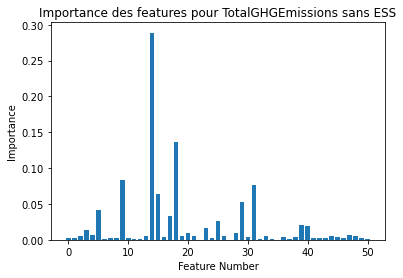

In [16]:
# Evaluation des features

X_train, X_test, y_train_all, y_test_all = train_test_split(X, y_2, test_size = 0.2, random_state = 42)
y_test = y_test_all
y_train = y_train_all
model = XGBRegressor(random_state = 42, n_estimators = 1000, max_depth = 5, min_child_weight = 1,
                     learning_rate = 0.27)
model.fit(X_train, y_train)

importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.xlabel("Feature Number")
plt.ylabel("Importance")
plt.title("Importance des features pour TotalGHGEmissions sans ESS")
plt.bar([x for x in range(len(importance))], importance);

Les meilleurs features sont:

1) PrimaryPropertyType_Hospital (28.9%)

2) PrimaryPropertyType_LargeOffice (13.6%)

3) BuildingType_Campus (8.3%)

4) PrimaryPropertyType_Supermarket/Grocery Store (7.7%)

5) PrimaryPropertyType_Hotel (6.4%)

6) PrimaryPropertyType_Senior Care Community (5.3%)

7) PropertyGFAParking (4.1%)

8) PrimaryPropertyType_Laboratory (3.3%)

9) PrimaryPropertyType_Restaurant (2.7%)

10) Neighborhood_EAST (2.0%)



Maintenant, nous allons étudier l'influence d'ENERGYSTARScore sur le TotalGHGEmissions.

<h2><center>IV. Impact d'ENERGY STAR Score sur les émissions de CO2</h2></center>

Comme précédemment, nous utilisons les 8 modèles afin de trouver le meilleur modèle.

In [17]:
# Modélisation avec les différents algorithmes

results = []

X_train, X_test, y_train_all, y_test_all = train_test_split(X_E, y_2, test_size = 0.2, random_state = 42)
column ='TotalGHGEmissions'
for algo_name, algo in algos.items():
    print('Testing: ',algo_name)
    y_test = y_test_all
    y_train = y_train_all
    model = algo
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    med_abs_err = median_absolute_error(y_test,y_pred)
    r_squared = r2_score(y_test, y_pred)
    results.append([algo_name, column, model.score(X_train, y_train), mae, rmse, med_abs_err, r_squared])
    print('**********Completed:**********')

Testing:  LinearRegression
**********Completed:**********
Testing:  Ridge
**********Completed:**********
Testing:  ElasticNet
**********Completed:**********
Testing:  Support Vector
**********Completed:**********
Testing:  BaggingRegressor
**********Completed:**********
Testing:  AdaBoostRegressor
**********Completed:**********
Testing:  Random Forest
**********Completed:**********
Testing:  XGBoost
**********Completed:**********


In [18]:
# Résultats de la modélisation avec ENERGYSTARScore

result_3 = pd.DataFrame(results, columns=['Modèle', 'Cible','Train score', 'MAE', 'RMSE', 'Med Abs Error', 'Regression(R2)'])
result_3

,Modèle,Cible,Train score,MAE,RMSE,Med Abs Error,Regression(R2)
0,LinearRegression,TotalGHGEmissions,0.649521,0.471777,0.626602,0.366408,0.685047
1,Ridge,TotalGHGEmissions,0.649273,0.473496,0.629749,0.366733,0.681876
2,ElasticNet,TotalGHGEmissions,0.115591,0.711233,1.061272,0.562665,0.096527
3,Support Vector,TotalGHGEmissions,0.736363,0.397181,0.627106,0.231501,0.684540
4,BaggingRegressor,TotalGHGEmissions,0.954308,0.334185,0.533779,0.205966,0.771448
5,AdaBoostRegressor,TotalGHGEmissions,0.341194,0.731018,0.839432,0.724652,0.434761
6,Random Forest,TotalGHGEmissions,0.967543,0.322200,0.515297,0.175938,0.787001
7,XGBoost,TotalGHGEmissions,0.986058,0.277093,0.428716,0.162830,0.852565


De nouveau, nous trouvons que le XGBoost est le meilleur modèle. Pour les 3 modélisations, nous trouvons un modèle du type 'Decision Tree' qui donne le meilleur résultat. Ceci indique que ce type des modèles est favorable pour ce type de modélisation.

Nous allons régler les hyperparamètres du modèle.

In [19]:
# Tuning de n_estimators du XGBoost

X_train, X_test, y_train, y_test = train_test_split(X_E, y_2, test_size = 0.2, random_state = 42)

parameters = {"n_estimators": [5, 10, 20, 50, 100, 200, 500, 1000]}

grid = GridSearchCV(estimator = XGBRegressor(random_state = 42), param_grid = parameters, 
                    scoring = 'r2', cv = 5, verbose = 1, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

rmse = mean_squared_error(y_test, grid_result.predict(X_test), squared = False)
mae = mean_absolute_error(y_test, grid_result.predict(X_test))
med_abs_err = median_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, grid_result.predict(X_test))
t_score = grid_result.score(X_train, y_train)
print(grid_result.best_params_)
print(rmse)
print(mae)
print(med_abs_err)
print(r_squared)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'n_estimators': 1000}
0.40912766347065577
0.24895466289420723
0.16282966546006467
0.8657299422920809


In [20]:
# Tuning du max_depth de XGBoost

X_train, X_test, y_train, y_test = train_test_split(X_E, y_2, test_size = 0.2, random_state = 42)

parameters = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(estimator = XGBRegressor(random_state = 42, n_estimators = 1000), param_grid = parameters, 
                    scoring = 'r2', cv = 5, verbose = 1, n_jobs = -1)

grid_result = grid.fit(X_train, y_train)
rmse = mean_squared_error(y_test, grid_result.predict(X_test), squared = False)
mae = mean_absolute_error(y_test, grid_result.predict(X_test))
med_abs_err = median_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, grid_result.predict(X_test))
t_score = grid_result.score(X_train, y_train)
print(grid_result.best_params_)
print(rmse)
print(mae)
print(med_abs_err)
print(r_squared)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 6}
0.40912766347065577
0.24895466289420723
0.16282966546006467
0.8657299422920809


In [21]:
# Tuning du min_child_weight de XGBoost

X_train, X_test, y_train, y_test = train_test_split(X_E, y_2, test_size = 0.2, random_state = 42)

parameters = {"min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(estimator = XGBRegressor(random_state = 42, n_estimators = 1000, max_depth = 6),
                    param_grid = parameters, scoring = 'r2', cv = 5, verbose = 1, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

rmse = mean_squared_error(y_test, grid_result.predict(X_test), squared = False)
mae = mean_absolute_error(y_test, grid_result.predict(X_test))
med_abs_err = median_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, grid_result.predict(X_test))
t_score = grid_result.score(X_train, y_train)
print(grid_result.best_params_)
print(rmse)
print(mae)
print(med_abs_err)
print(r_squared)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_child_weight': 1}
0.40912766347065577
0.24895466289420723
0.16282966546006467
0.8657299422920809


Suite au réglage des paramètres, nous avons amélioré le modèle. Maintenant, nous évaluerons les features du modèle et étudier l'influence d'ENERGYSTARScore.

Feature: 0, Score: 0.00149
Feature: 1, Score: 0.00195
Feature: 2, Score: 0.00313
Feature: 3, Score: 0.01338
Feature: 4, Score: 0.00375
Feature: 5, Score: 0.03273
Feature: 6, Score: 0.00242
Feature: 7, Score: 0.00144
Feature: 8, Score: 0.00191
Feature: 9, Score: 0.00161
Feature: 10, Score: 0.04861
Feature: 11, Score: 0.00118
Feature: 12, Score: 0.00024
Feature: 13, Score: 0.00089
Feature: 14, Score: 0.00494
Feature: 15, Score: 0.37199
Feature: 16, Score: 0.04244
Feature: 17, Score: 0.00656
Feature: 18, Score: 0.04091
Feature: 19, Score: 0.17287
Feature: 20, Score: 0.00226
Feature: 21, Score: 0.00573
Feature: 22, Score: 0.00392
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00846
Feature: 25, Score: 0.00055
Feature: 26, Score: 0.01687
Feature: 27, Score: 0.00291
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00434
Feature: 30, Score: 0.04326
Feature: 31, Score: 0.00627
Feature: 32, Score: 0.05290
Feature: 33, Score: 0.00063
Feature: 34, Score: 0.00271
Feature: 35, Score: 0.00169
Fe

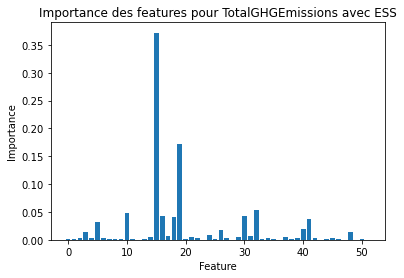

In [22]:
# Evaluation des features

X_train, X_test, y_train_all, y_test_all = train_test_split(X_E, y_2, test_size = 0.2, random_state = 42)
y_test = y_test_all
y_train = y_train_all
model = XGBRegressor(random_state = 42, n_estimators = 1000, max_depth = 6, min_child_weight = 1)
model.fit(X_train, y_train)

importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Importance des features pour TotalGHGEmissions avec ESS")
plt.bar([x for x in range(len(importance))], importance);

Les meilleurs features sont:

1) PrimaryPropertyType_Hospital (37.2%)

2) PrimaryPropertyType_LargeOffice (17.3%)

3) PrimaryPropertyType_Supermarket/Grocery Store (5.3%)

4) BuildingType_Campus (4.9%)

5) PrimaryPropertyType_Senior Care Community (4.3%)

6) PrimaryPropertyType_Hotel (4.2%)

7) PrimaryPropertyType_Laboratory (4.1%)

8) Neighborhood_GREATER DUWAMISH (3.8%)

9) PropertyGFAParking (3.3%)

10) Neighborhood_EAST (1.9%)

De ces résultats, nous trouvons que les features ont une influence similaire (Prédictions TotalGHGEmissions) sur ce modèle. L'ENERGYSTARScore est le 29ème (sur 51) meilleure feature du modèle. Son importance est 0.24%.

Donc, l'ajout d'ENERGYSTARScore améliore la régression du modèle. Par contre, il ne joue pas un rôle signifiant sur le modèle.

<h3><center>IV.2. Conclusions</h3></center>

1) La modélisation sans les relevés de consommation ne donne pas la même qualité du fit.

2) La modélisation avec les variables commerciales est possible et nous trouvons un fit qui est assez bien.

3) Les modèles du type 'Decision Tree' ont le meilleur fit.

4) L'ajout des données (données commerciales des bâtiments) peut améliorer la qualité du fit.

5) L'ENERGYSTARScore améliore la qualité du fit mais il n'a pas une contribution signifiante sur le modèle.